In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


# Proyek Analisis Data: Bike Sharing Dataset
**Nama:** Khairu Dzaki Syahdana
**Email:** khairudzakisyahdana@gmail.com
**ID Dicoding:** khairudzaki07

## Menentukan Pertanyaan Bisnis
1. Bagaimana performa penyewaan sepeda pada tahun 2011 dibandingkan 2012?
2. Bagaimana pengaruh musim (season) terhadap jumlah penyewaan sepeda harian?

## Dasar Teori
- **Analisis Data:** Proses inspeksi, pembersihan, dan pemodelan data untuk menemukan informasi berguna demi pengambilan keputusan.
- **Descriptive vs EDA:** Analisis deskriptif hanya menggambarkan data masa lalu (apa yang terjadi), sedangkan EDA (Exploratory Data Analysis) mencari pola, hubungan, dan anomali lebih dalam untuk menemukan "mengapa" itu terjadi.
- **Data Cleaning:** Penting untuk membuang noise, missing value, atau duplikasi agar hasil analisis akurat dan tidak bias.
- **Visualisasi Data:** Membantu otak manusia memproses informasi kompleks dengan cepat melalui representasi grafis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kita hapus import streamlit karena tidak dipakai di analisis notebook ini

# Load data
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Cek info data
day_df.info()

# Cek missing value
print(day_df.isnull().sum())

# Cek duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# Cleaning: Mengubah tipe data dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengubah angka menjadi label biar mudah dibaca visualisasinya
# Season: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Yr (Tahun): 0:2011, 1:2012
day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday      

/tmp/ipython-input-660606192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='yr', y='cnt', data=day_df, estimator=sum, ci=None)


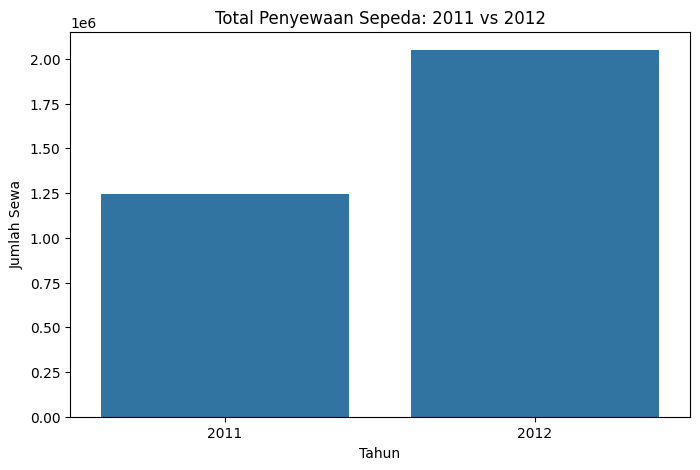

/tmp/ipython-input-660606192.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, estimator=sum, ci=None, order=['Spring', 'Summer', 'Fall', 'Winter'])


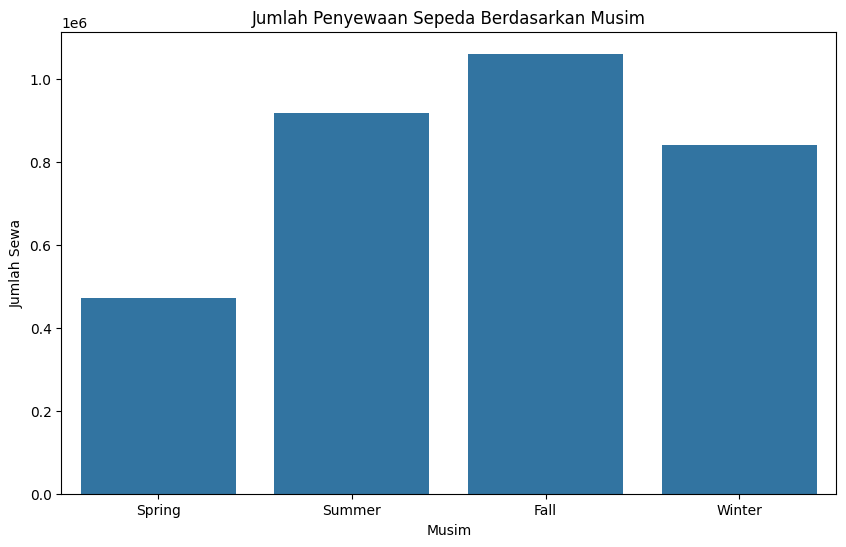

In [ ]:
# Pertanyaan 1: Performa 2011 vs 2012
plt.figure(figsize=(8, 5))
sns.barplot(x='yr', y='cnt', data=day_df, estimator=sum, ci=None)
plt.title('Total Penyewaan Sepeda: 2011 vs 2012')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Sewa')
plt.show()

# Pertanyaan 2: Pengaruh Musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_df, estimator=sum, ci=None, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. LOAD DATA ULANG (Biar komputer kenal lagi)
day_df = pd.read_csv("day.csv")

# 2. Pilih Fitur (X) dan Target (y)
# X = Data pendukung (Suhu, Kelembaban, Kecepatan Angin)
# y = Target tebakan (Jumlah Sewa)
X = day_df[['temp', 'hum', 'windspeed']]
y = day_df['cnt']

# 3. Bagi Data (80% Belajar, 20% Ujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Latih Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluasi Hasil
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print("Akurasi Model (R2 Score):", round(score, 2))
print("--------------------------------")
print("Contoh 5 Prediksi Mesin: ", y_pred[:5].astype(int))
print("Contoh 5 Data Asli     : ", y_test[:5].values)


Akurasi Model (R2 Score): 0.5
--------------------------------
Contoh 5 Prediksi Mesin:  [4162 2714 3419 4012 4883]
Contoh 5 Data Asli     :  [6606 1550 3747 6041 7538]


## Conclusion
1. **Performa Tahunan:** Terjadi peningkatan signifikan jumlah penyewaan sepeda dari tahun 2011 ke 2012. Ini menunjukkan bisnis berkembang positif.
2. **Pengaruh Musim:** Musim gugur (Fall) memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas (Summer). Musim semi (Spring) memiliki penyewaan terendah, kemungkinan karena cuaca yang kurang mendukung atau masa transisi.